In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sl
from math import sqrt
%matplotlib inline

In [89]:
data = sl.datasets.load_digits()

In [90]:
data, target = data['data'], data['target']

In [44]:
def crossval(estimator):
    return np.mean(sl.model_selection.cross_val_score(estimator, data, target, cv=10, n_jobs=4))
def write_answer(n, answer):
    with open(str(n)+"answer.txt",'w') as f:
        f.write(str(answer))

In [38]:
DTreeClassifier = sl.tree.DecisionTreeClassifier()

In [39]:
crossval(DTreeClassifier)

0.8326446603970871

In [40]:
write_answer(1,crossval(DTreeClassifier))

In [41]:
BagClass = sl.ensemble.BaggingClassifier(base_estimator=DTreeClassifier, n_estimators=100)

In [42]:
crossval(BagClass)

0.9270915733221144

In [45]:
write_answer(2,crossval(BagClass))

In [80]:
nofullBag = sl.ensemble.BaggingClassifier(base_estimator=DTreeClassifier,
                                          n_estimators=100, n_jobs=4, max_features=8)

In [74]:
crossval(nofullBag)

0.9276744556280306

In [75]:
write_answer(3,crossval(nofullBag))

In [76]:
nofullTree = sl.tree.DecisionTreeClassifier(max_features=8)
treeBag = sl.ensemble.BaggingClassifier(base_estimator=nofullTree, n_estimators=100, n_jobs=4)


In [77]:
crossval(treeBag)

0.9594635222195066

In [78]:
write_answer(4,crossval(treeBag))

In [92]:
randomForest = sl.ensemble.RandomForestClassifier(n_estimators=100, max_features=8, n_jobs=4)

In [93]:
crossval(randomForest)

0.9522000005896534

In [103]:
params = {'max_features': [8, 10 , 64], 'n_estimators': [100, 300, 900], 'max_depth': [1, 5, 10]}

In [104]:
rforest = sl.ensemble.RandomForestClassifier()
grid = sl.model_selection.GridSearchCV(rforest, params, cv=10, n_jobs=4)

In [105]:
res = grid.fit(data,target)

In [108]:
res.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
def forest(n):
    return sl.ensemble.RandomForestClassifier(max_features=n)
maxFeature = []
for i in range(1,64):
    maxFeature.append(crossval(forest(i)))

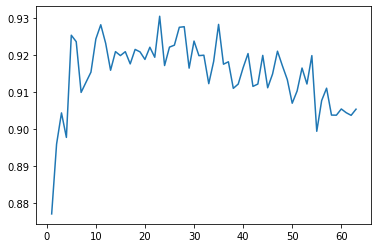

In [111]:
plt.plot(list(range(1,64)), maxFeature)

In [112]:
def forestb(n):
    return sl.ensemble.RandomForestClassifier(n_estimators=n)

In [113]:
Estimators = []
for i in range(10, 1000, 50):
    Estimators.append(crossval(forestb(i)))

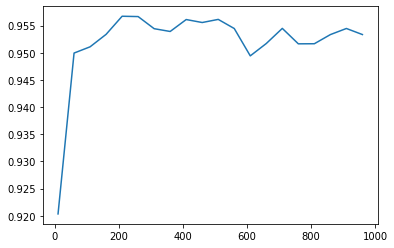

In [115]:
plt.plot(list(range(10,1000,50)), Estimators)

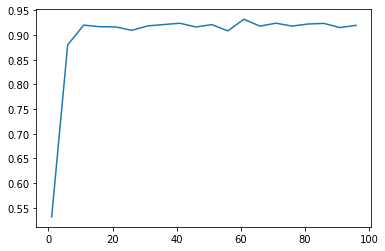

In [116]:
def forestc(n):
    return sl.ensemble.RandomForestClassifier(n_jobs=4, max_depth=n)
depth = []
for i in range(1,100, 5):
    depth.append(crossval(forestc(i)))
plt.plot(list(range(1,100,5)),depth)